In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#生成数据

#下载MNIST手写数字数据集
train_dataset = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=True, transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=False, transform = transforms.ToTensor(),download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [3]:
class muti_class_LinearNet(nn.Module):
    def __init__(self,num_inputs, num_outputs, num_hiddens):
        super(muti_class_LinearNet,self).__init__()
        self.linear1 = nn.Linear(num_inputs,num_hiddens)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hiddens,num_outputs)
    
    def forward(self,x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        y = self.relu(x)
        return y

In [4]:
#模型训练
def train():
    num_epochs = 20
    train_ls, test_ls = [], []
    for epoch in range(num_epochs):
        ls, count = 0, 0
        for X,y in train_loader:
            X = X.reshape(-1,num_inputs)
            l=loss(net(X),y).sum()
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            ls += l.item()
            count += y.shape[0]
        train_ls.append(ls/count)
        ls, count = 0, 0
        for X,y in test_loader:
            X = X.reshape(-1,num_inputs)
            l=loss(net(X),y).sum()
            ls += l.item()
            count += y.shape[0]
        test_ls.append(ls/count)
        
        print('epoch: %d, train loss: %f, test loss: %f'%(epoch+1,train_ls[-1],test_ls[-1]))
    return train_ls,test_ls

* 讨论隐藏单元个数

In [5]:
Num_hiddens = [100,200,300,400,500,600,700]
Train_loss, Test_loss = [], []
for num_hiddens in Num_hiddens:
    num_inputs, num_outputs = 784, 10
    net = muti_class_LinearNet(num_inputs, num_outputs, num_hiddens)
    for param in net.parameters():
        nn.init.normal_(param,mean=0, std= 0.01)
    loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(),lr = 0.001)
    train_ls, test_ls = train()
    Train_loss.append(train_ls)
    Test_ls.append(test_ls)

epoch: 1, train loss: 0.071644, test loss: 0.071348
epoch: 2, train loss: 0.070335, test loss: 0.069039
epoch: 3, train loss: 0.066232, test loss: 0.062615
epoch: 4, train loss: 0.057744, test loss: 0.052434
epoch: 5, train loss: 0.048127, test loss: 0.043961
epoch: 6, train loss: 0.041528, test loss: 0.038854
epoch: 7, train loss: 0.037486, test loss: 0.035575
epoch: 8, train loss: 0.034778, test loss: 0.033273
epoch: 9, train loss: 0.032834, test loss: 0.031582
epoch: 10, train loss: 0.031366, test loss: 0.030283
epoch: 11, train loss: 0.030218, test loss: 0.029254
epoch: 12, train loss: 0.029290, test loss: 0.028409
epoch: 13, train loss: 0.028520, test loss: 0.027695
epoch: 14, train loss: 0.027872, test loss: 0.027108
epoch: 15, train loss: 0.027316, test loss: 0.026583
epoch: 16, train loss: 0.026833, test loss: 0.026133
epoch: 17, train loss: 0.026412, test loss: 0.025750
epoch: 18, train loss: 0.026040, test loss: 0.025402
epoch: 19, train loss: 0.025710, test loss: 0.025082
ep

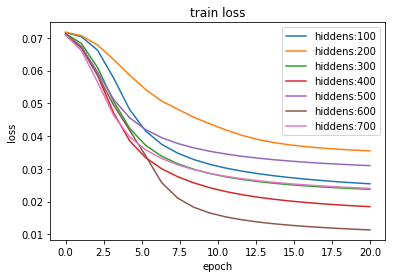

In [11]:
x = np.linspace(0,len(train_ls),len(train_ls))
for i in range(0,len(Num_hiddens)):
    plt.plot(x,Train_loss[i],label= f'hiddens:{Num_hiddens[i]}',linewidth=1.5)
    plt.xlabel('epoch')
    plt.ylabel('loss')
plt.legend()
plt.title('train loss')
plt.show()

* 讨论隐藏层数

In [17]:
class muti_class_LinearNet_1(nn.Module):
    def __init__(self,num_inputs=784, num_outputs=10, num_hiddens=600):
        super(muti_class_LinearNet_1,self).__init__()
        self.linear1 = nn.Linear(num_inputs,num_hiddens)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hiddens,num_outputs)
    
    def forward(self,x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        y = self.relu(x)
        return y

In [18]:
class muti_class_LinearNet_2(nn.Module):
    def __init__(self,num_inputs=784, num_outputs=10, num_hiddens1=600, num_hiddens2=400):
        super(muti_class_LinearNet_2,self).__init__()
        self.linear1 = nn.Linear(num_inputs,num_hiddens1)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hiddens1,num_hiddens2)
        self.linear3 = nn.Linear(num_hiddens2,num_outputs)
    
    def forward(self,x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        y = self.relu(x)
        return y

In [19]:
class muti_class_LinearNet_3(nn.Module):
    def __init__(self,num_inputs=784, num_outputs=10, num_hiddens1=600, num_hiddens2=400, num_hiddens3=200):
        super(muti_class_LinearNet_3,self).__init__()
        self.linear1 = nn.Linear(num_inputs,num_hiddens1)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hiddens1,num_hiddens2)
        self.linear3 = nn.Linear(num_hiddens2,num_hiddens3)
        self.linear4 = nn.Linear(num_hiddens3,num_outputs)
    
    def forward(self,x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.relu(x)
        x = self.linear4(x)
        y = self.relu(x)
        return y

In [26]:
select_net = [muti_class_LinearNet_1,muti_class_LinearNet_2,muti_class_LinearNet_3]
n_Train_loss, n_Test_loss = [], []
for model in select_net:
    net = model()
    for param in net.parameters():
        nn.init.normal_(param,mean=0, std= 0.01)
    loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(),lr = 0.001)
    train_ls, test_ls = train()
    n_Train_loss.append(train_ls)
    n_Test_loss.append(test_ls)

epoch: 1, train loss: 0.070708, test loss: 0.069022
epoch: 2, train loss: 0.065632, test loss: 0.061293
epoch: 3, train loss: 0.055794, test loss: 0.049960
epoch: 4, train loss: 0.045711, test loss: 0.041593
epoch: 5, train loss: 0.039396, test loss: 0.036826
epoch: 6, train loss: 0.035669, test loss: 0.033834
epoch: 7, train loss: 0.033215, test loss: 0.031773
epoch: 8, train loss: 0.031466, test loss: 0.030262
epoch: 9, train loss: 0.030140, test loss: 0.029099
epoch: 10, train loss: 0.029095, test loss: 0.028140
epoch: 11, train loss: 0.028246, test loss: 0.027377
epoch: 12, train loss: 0.027542, test loss: 0.026731
epoch: 13, train loss: 0.026949, test loss: 0.026207
epoch: 14, train loss: 0.026447, test loss: 0.025744
epoch: 15, train loss: 0.026017, test loss: 0.025347
epoch: 16, train loss: 0.025643, test loss: 0.025005
epoch: 17, train loss: 0.025317, test loss: 0.024705
epoch: 18, train loss: 0.025028, test loss: 0.024437
epoch: 19, train loss: 0.024773, test loss: 0.024199
ep

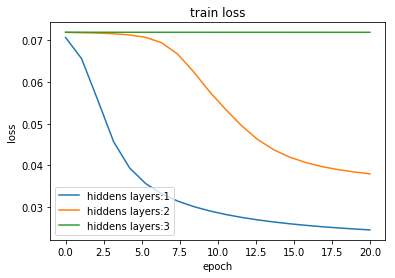

In [27]:
x = np.linspace(0,len(train_ls),len(train_ls))
for i in range(0,3):
    plt.plot(x,n_Train_loss[i],label= f'hiddens layers:{i+1}',linewidth=1.5)
    plt.xlabel('epoch')
    plt.ylabel('loss')
plt.legend()
plt.title('train loss')
plt.show()